### Regresión Lineal

In [1]:
# Librerías
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
# Funcion generadora
make_regression?

In [2]:
X, y, sintetic_coefficient = make_regression(
    n_samples = 1000, 
    n_features =30,
    n_informative = 10,
    noise = 100,
    coef=True,
    random_state=5) #Semilla: replicar mis resultados

In [3]:
print(X.shape)
print(y.shape)
print(sintetic_coefficient.shape)

(1000, 30)
(1000,)
(30,)


In [4]:
sintetic_coefficient

array([ 1.54531433,  0.        ,  0.        ,  0.        , 28.82840691,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 29.63773322,  0.        ,  0.        ,
        0.        , 70.11584221, 91.74972211, 97.13930919, 95.41503093,
        0.        ,  0.        ,  0.        ,  0.        ,  2.50722912,
        0.        ,  0.        , 32.09469902, 15.23202972,  0.        ])

In [5]:
X[1]

array([ 0.08262701,  0.16717001, -1.01258052, -0.0720507 , -1.41545204,
       -1.02767235,  1.44800145, -1.76812224, -0.31171023,  2.23119102,
        1.40431657,  0.61607626,  0.06993648,  0.37717235,  2.16639263,
        0.64056975,  0.5943752 , -0.3081966 ,  0.21107705,  1.99065373,
        0.62328755,  0.42957044, -0.57447033, -0.50483824, -0.57432787,
        0.77735517, -0.31659264,  0.9850458 , -0.83663725, -0.05860156])

In [6]:
y[1]

164.29488316969332

In [7]:
np.dot(X[1],sintetic_coefficient)

202.66664102344006

In [8]:
# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state = 5,
                                                    train_size = 100)

In [9]:
print(X_train.shape)

(100, 30)


In [10]:
print(X_test.shape)

(900, 30)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear_model = LinearRegression()

In [13]:
linear_regression_model = linear_model.fit(X_train,y_train)

In [16]:
# Returns the coefficient of determination R^2 of the prediction.
linear_regression_model.score?

In [14]:
print("R2 del set train es:",linear_regression_model.score(X_train,y_train))
print("R2 del set test es:",linear_regression_model.score(X_test,y_test))

R2 del set train es: 0.834703008814793
R2 del set test es: 0.7415409861186034


Como vemos el R2 en el conjunto de entrenamiento es muy alto, pero muy baj en el conjunto de test. Esto suele ser un indicativo de que el modelo esta sobreajustado

#Vamos aprovechar los datos sinteticos para evaluar como se comporta el modelo real sobre todos los datos

In [15]:
# Ver los coeficientes
linear_regression_model.coef_

array([ 2.25767760e+01, -2.59683108e+00,  5.12321841e+00, -4.45324905e-02,
        3.01368693e+01, -1.18330829e+01, -6.23038165e+00, -3.55962951e+00,
       -1.03254808e+01, -6.60983193e+00,  2.75951164e+00,  2.90129973e-02,
        2.34265555e+01,  5.92207805e+00, -2.70856608e+00, -9.18249040e-01,
        7.11297763e+01,  8.34710524e+01,  8.73065968e+01,  9.47036051e+01,
        7.06611137e+00,  9.54293676e+00,  1.37230989e+01, -8.81877576e+00,
        4.08092041e-01,  6.51969492e+00, -1.21894770e+01,  3.69153659e+01,
        2.46555722e+01, -9.45575478e+00])

In [16]:
#Se desea calcular empleando la función generada por el make_regresion con todos los datos generados.
from sklearn.metrics import r2_score

In [17]:
print(r2_score(np.dot(X,sintetic_coefficient),y))

0.7456818693233815


Se tiene un R2=0.6 es un resultado ideal para nuestro conjunto de datos

In [18]:
print(r2_score(np.dot(X_train,sintetic_coefficient),y_train))
print(r2_score(np.dot(X_test,sintetic_coefficient),y_test))

0.7711545854086984
0.7431344991325657


También vamos a aprovechar que tenemos conjuntos de datos sintéticos para comparar los coeficientes aprendidos por el modelo con los coeficientes generados por el modelo sintético

In [19]:
# Se desea ordenar los coeficientes sinteticos de mayor a menor
coefficient_sorting = np.argsort(sintetic_coefficient)[::-1]
coefficient_sorting

array([18, 19, 17, 16, 27, 12,  4, 28, 24,  0,  8,  7,  6, 10,  5,  3,  2,
        1,  9, 29, 11, 13, 15, 20, 21, 22, 23, 25, 26, 14], dtype=int64)

In [20]:
import matplotlib.pyplot as plt

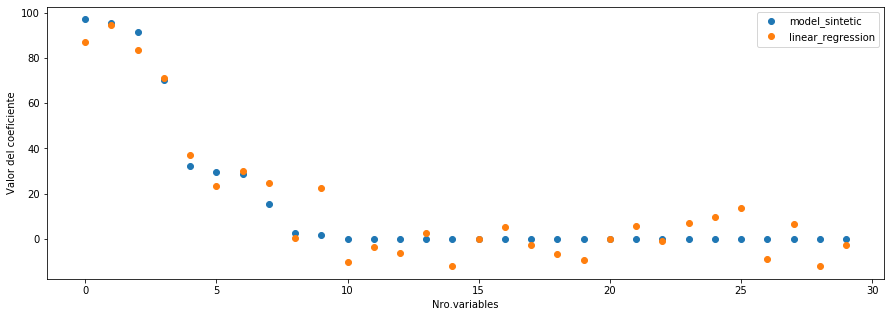

In [21]:
# Realizar una gráfica
plt.figure(figsize = (15,5))
plt.plot(sintetic_coefficient[coefficient_sorting],'o',
         label = 'model_sintetic')

plt.plot(linear_regression_model.coef_[coefficient_sorting],'o',
        label = 'linear_regression')


plt.legend()
plt.xlabel('Nro.variables')
plt.ylabel('Valor del coeficiente')
plt.show()

Un método útil para conocer si nuestro modelo sufre de underfitting o de overfitting es calcular **las curvas de aprendizaje**. Estas muestras el score del modelo en los conjuntos de train y de test para un numero determinado de muestras de entrenamiento

In [22]:
# Importar la clase curva de aprendizaje
from sklearn.model_selection import learning_curve

In [23]:
learning_curve?

In [24]:
# [0-1]: Indica la proporción de registros que serán usados como X_train
train_sizes = np.linspace(.1,1,20)

In [25]:
train_sizes

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

In [40]:
# Mirar las salidas

In [26]:
training_set_size,train_scores,test_scores = learning_curve(LinearRegression(),
               X,
               y,
               train_sizes = np.linspace(.1,1,20),
               cv = 5)

In [27]:
training_set_size

array([ 80, 117, 155, 193, 231, 269, 307, 345, 383, 421, 458, 496, 534,
       572, 610, 648, 686, 724, 762, 800])

Definir una función

In [28]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimador, X, y):
    
    training_set_size,train_scores,test_scores = learning_curve(LinearRegression(),
               X,
               y,
               train_sizes = np.linspace(.1,1,20),
               cv = 3)
    
    estimator_name = estimador.__class__.__name__
    
    plt.plot(training_set_size,train_scores.mean(axis = 1),'--',
            label ='training_scores'+ estimator_name)
    
    plt.plot(training_set_size,test_scores.mean(axis = 1),'-',
            label = 'test_scores'+ estimator_name)
    
    plt.xlabel('Training set size')
    plt.ylabel('R2-Score')
    plt.legend()
    plt.ylim(-0.1,1.1)

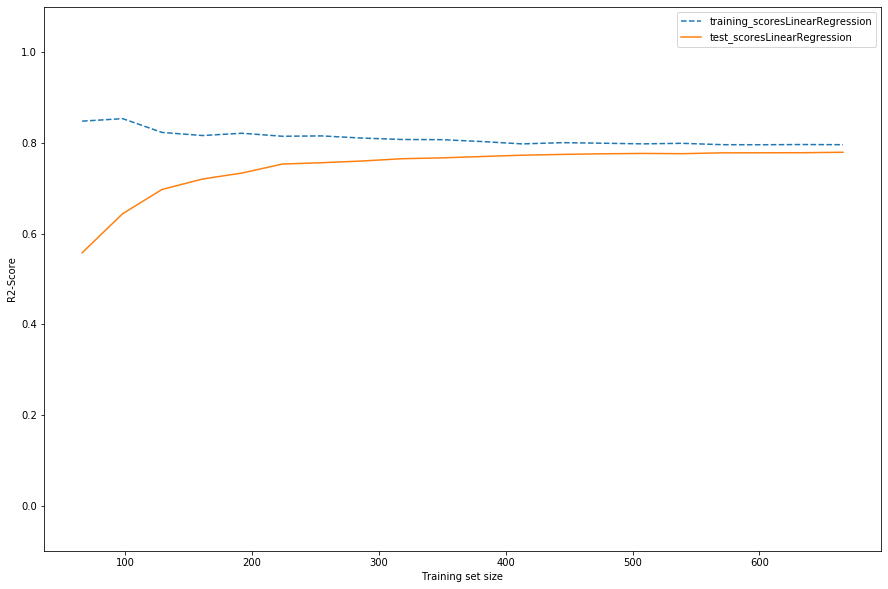

In [29]:
plt.figure(figsize = (15,10))
plot_learning_curve(LinearRegression(),X,y)

# Ridge Regression (L2 Penalty)

In [30]:
from sklearn.linear_model import Ridge

In [31]:
Ridge?

In [32]:
# Inicializar los parámetros de Ridge
ridge_models = {}
training_scores_ridge = []
test_scores_ridge =[]

alphas = [100,80,60,30,15,10,9,8,7,6,5,1,0.1,0.01,0.001]

In [33]:
for i in alphas:
    ridge = Ridge(alpha = i).fit(X_train,y_train)
    training_scores_ridge.append(ridge.score(X_train,y_train))
    test_scores_ridge.append(ridge.score(X_test,y_test))
    ridge_models[i] = ridge

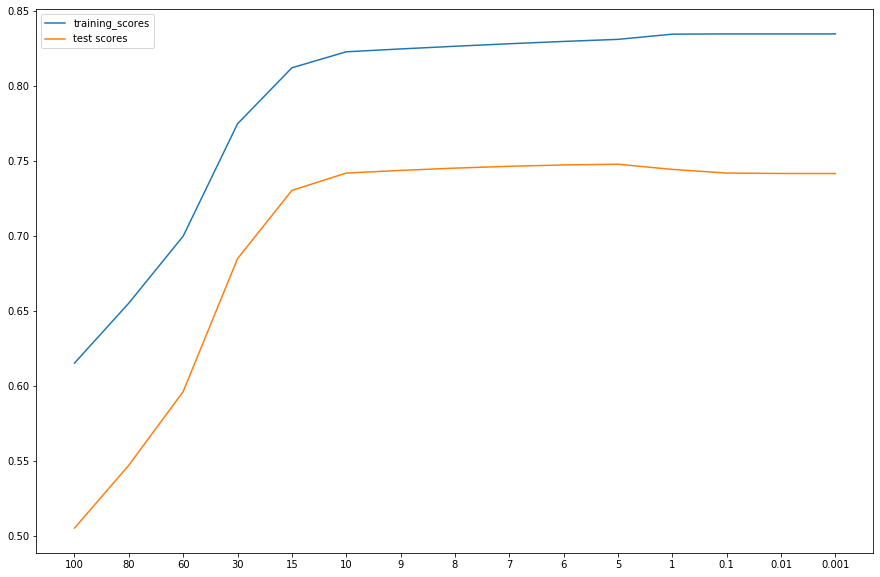

In [34]:
plt.figure(figsize=(15,10))
plt.plot(training_scores_ridge,label='training_scores')
plt.plot(test_scores_ridge,label ='test scores')
plt.xticks(range(len(alphas)),alphas)
plt.legend(loc = 'best')

Tenemos el maximo score en el conjunto de test para alpha = 10.

Ejercicio:
* ¿Que pasa para los valores de alpha > 10?
* ¿Que pasa para valores de alpha < 10?

In [35]:
coefficient_sorting

array([18, 19, 17, 16, 27, 12,  4, 28, 24,  0,  8,  7,  6, 10,  5,  3,  2,
        1,  9, 29, 11, 13, 15, 20, 21, 22, 23, 25, 26, 14], dtype=int64)

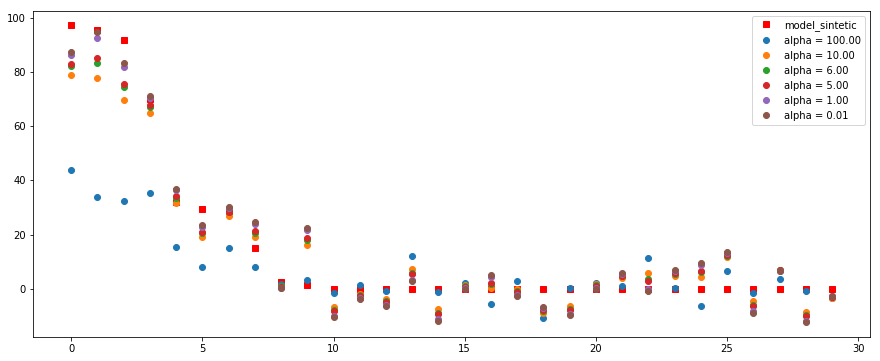

In [51]:
plt.figure(figsize = (15,6))
plt.plot(sintetic_coefficient[coefficient_sorting],
         "s",label = 'model_sintetic',c = 'r')

for i, alpha in enumerate([100,10,6,5,1,0.01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting],'o',
            label = 'alpha = %.2f'% alpha)
    
plt.legend()

* Valores altos de alpha producen modelo que tienden a ajustar los pesos a cero. Es decir aumenta el sesgo del modelo

* Valores bajos de alpha lo que produce es que el modelo se comporta como una regresión lineal sin regularización

En ese sentido es muy importante elegir el valor optimo de alpha

## Lasso (Penalidad L1)

In [52]:
# Importar la libreria
from sklearn.linear_model import Lasso

In [53]:
lasso_models = {}
training_scores_lasso = []
test_scores_lasso = []

alphas = [100,80,60,30,15,10,9,8,7,6,5,1,0.1,0.01,0.001]

for i in alphas:
    lasso = Lasso(alpha = i).fit(X_train,y_train)
    training_scores_lasso.append(lasso.score(X_train,y_train))
    test_scores_lasso.append(lasso.score(X_test,y_test))
    lasso_models[i] =lasso

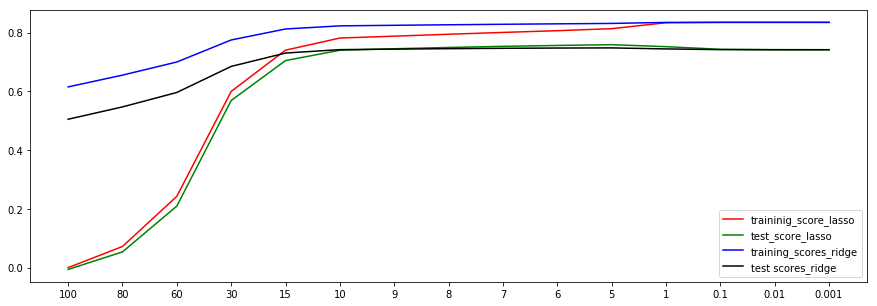

In [54]:
plt.figure(figsize = (15,5))
plt.plot(training_scores_lasso,label = 'traininig_score_lasso',c = 'r')
plt.plot(test_scores_lasso,label = 'test_score_lasso',c='g')
plt.plot(training_scores_ridge,label='training_scores_ridge',c='b')
plt.plot(test_scores_ridge,label ='test scores_ridge',c='k')
plt.xticks(range(len(alphas)),alphas)
plt.legend(loc = 'best')

In [55]:
lasso_models[5].coef_

array([13.91745311,  0.        , -0.        ,  0.        , 24.07577058,
       -1.34160782, -0.        , -0.        , -1.43035061, -6.97078716,
        3.85844217, -0.        , 17.359724  ,  0.        , -0.        ,
        1.68638434, 66.88936483, 71.48732595, 81.99014538, 78.61174951,
        0.        ,  0.88313593,  6.43577197, -0.        ,  0.        ,
        4.50974782, -2.41772323, 28.96842608, 15.16012724, -3.17015227])

In [56]:
ridge_models[5].coef_

array([ 18.82044454,  -1.11165104,   2.2385448 ,   0.86287586,
        28.48830117,  -9.32133752,  -4.75585247,  -2.53079803,
        -8.14490031,  -7.88447275,   5.57436982,   1.12578402,
        20.89175046,   4.86618914,  -3.02150267,   3.03540326,
        67.855648  ,  75.69237688,  82.89425589,  85.06551409,
         5.74105718,   6.72515846,  12.46723107,  -6.20005568,
         0.86738867,   6.84137972, -10.1014158 ,  34.14452584,
        21.31877176,  -7.75728714])

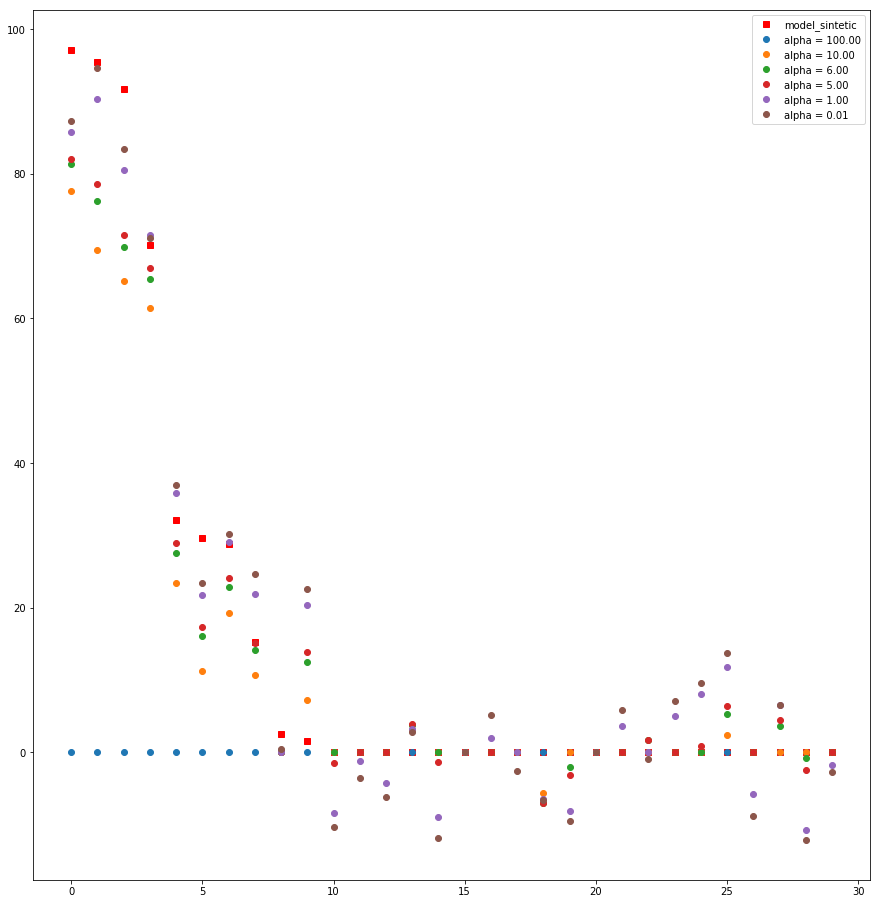

In [57]:
plt.figure(figsize = (15,16))
plt.plot(sintetic_coefficient[coefficient_sorting],
         "s",label = 'model_sintetic',c = 'r')

for i, alpha in enumerate([100,10,6,5,1,0.01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting],'o',
            label = 'alpha = %.2f'% alpha)
    
plt.legend()